In [86]:
import tensorflow as tf
from tensorflow import *
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense , Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.1.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import os

In [3]:
file=open(r'C:\Users\HP\AppData\Local\Programs\Python\Python35\WISDM_ar_v1.1\WISDM_ar_v1.1_raw.txt')
lines=file.readlines()
processedlist=[]

for i ,line in enumerate(lines):
    try:
        line=line.split(',') #to split with ,
        last=line[5].split(';')[0] #to split 5 columns before ;
        last=last.strip() #to remove white space
        if last=='':
            break;
        temp=[line[0],line[1],line[2],line[3],line[4],last]
        processedlist.append(temp)
    except:
        print(" ")

In [4]:
clm=["user","activity","time","x","y","z"]

data=pd.DataFrame(data=processedlist, columns=clm)

In [5]:
print(data.head())
print(data.shape)
print(data.info())
data.isnull().sum()
data['activity'].value_counts()

  user activity            time            x          y            z
0   33  Jogging  49105962326000   -0.6946377  12.680544   0.50395286
1   33  Jogging  49106062271000     5.012288  11.264028   0.95342433
2   33  Jogging  49106112167000     4.903325  10.882658  -0.08172209
3   33  Jogging  49106222305000  -0.61291564  18.496431    3.0237172
4   33  Jogging  49106332290000   -1.1849703  12.108489     7.205164
(343416, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB
None


Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [6]:
data['x']=data['x'].astype('float')
data['y']=data['y'].astype('float')
data['z']=data['z'].astype('float')


Fs=20
activities=data['activity'].value_counts().index
print(activities)

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')


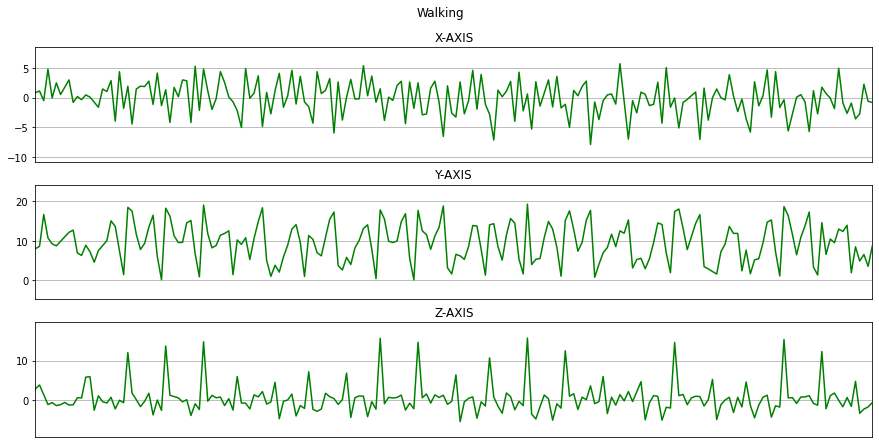

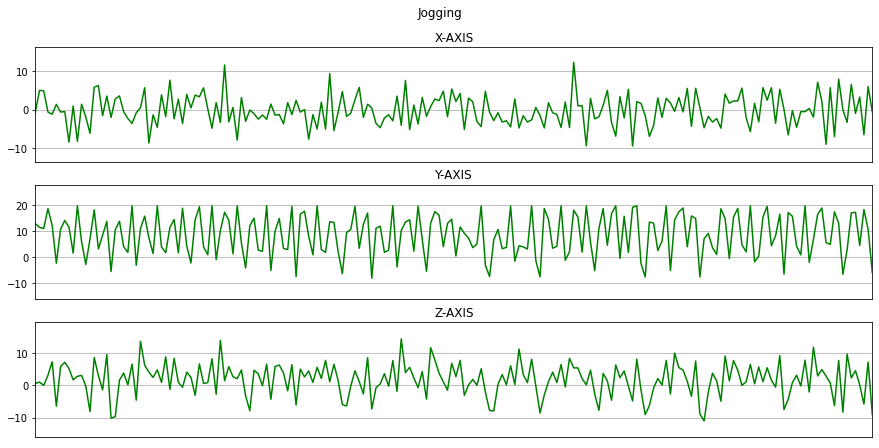

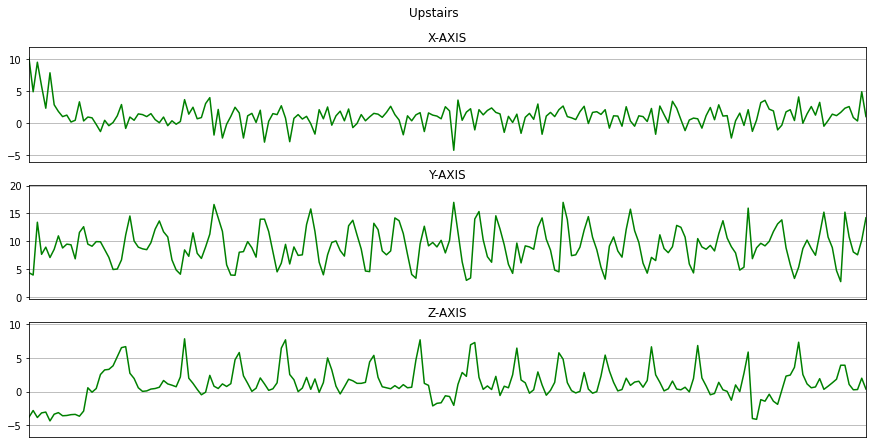

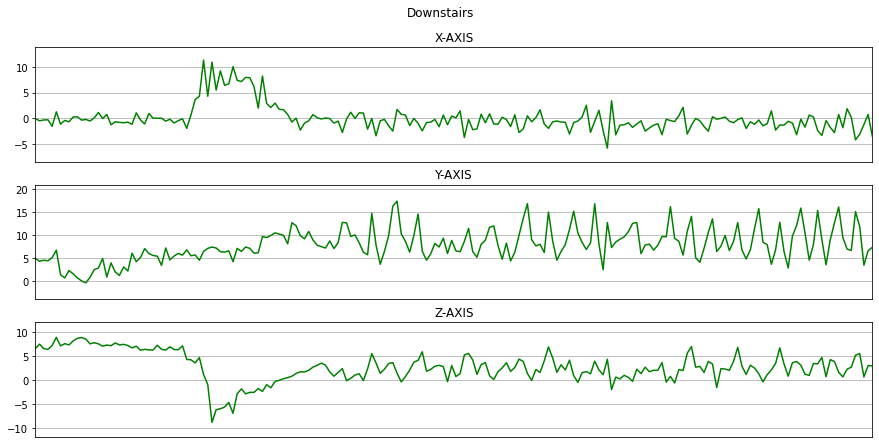

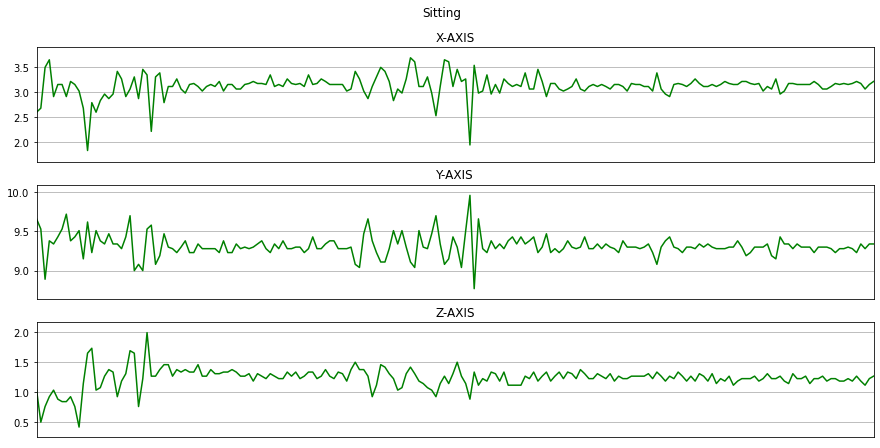

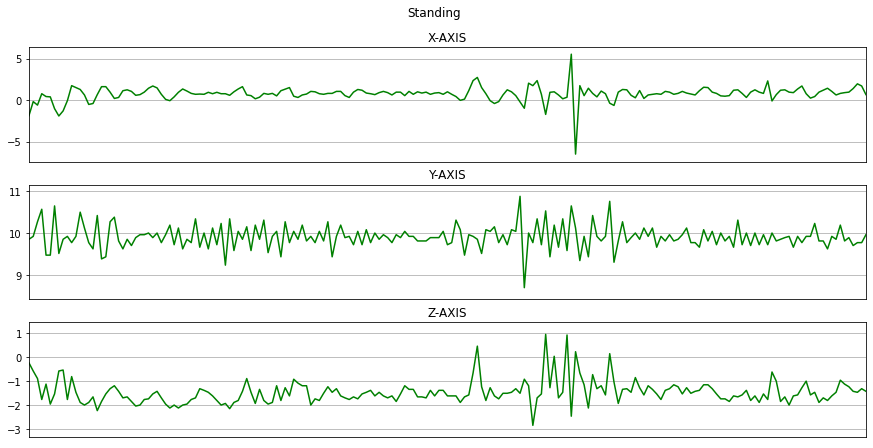

In [7]:
def plot_activity(activity, data):
    fig,(ax0,ax1,ax2)=plt.subplots(nrows=3,figsize=(15,7),sharex=True)
    plot_axis(ax0,data['time'],data['x'],'X-AXIS')
    plot_axis(ax1, data['time'], data['y'], 'Y-AXIS')
    plot_axis(ax2, data['time'], data['z'], 'Z-AXIS')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
def plot_axis(ax,x,y,title):
    ax.plot(x,y,'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y)-np.std(y),max(y)+np.std(y)])
    ax.set_xlim([min(x),max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot=data[(data['activity']==activity)][:Fs*10]
    plot_activity(activity ,data_for_plot)

In [8]:
df=data.drop(['user','time'],axis=1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [9]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [10]:
walking=df[df['activity']=='walking'].head(3555).copy()
Jogging=df[df['activity']=='Jogging'].head(3555).copy()
Upstairs=df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs=df[df['activity']=='Downstairs'].head(3555).copy()
Sitting=df[df['activity']=='Sitting'].head(3555).copy()
Standing=df[df['activity']=='Standing'].copy()

In [11]:
Balanced_data=pd.DataFrame()
Balanced_data=Balanced_data.append([walking,Jogging,Upstairs,Downstairs,Sitting,Standing])
Balanced_data.shape

(17775, 4)

In [12]:
Balanced_data['activity'].value_counts()

Standing      3555
Upstairs      3555
Downstairs    3555
Jogging       3555
Sitting       3555
Name: activity, dtype: int64

In [13]:
label=LabelEncoder()
Balanced_data['label']=label.fit_transform(Balanced_data['activity'])
print(Balanced_data.head())

  activity         x          y         z  label
0  Jogging -0.694638  12.680544  0.503953      1
1  Jogging  5.012288  11.264028  0.953424      1
2  Jogging  4.903325  10.882658 -0.081722      1
3  Jogging -0.612916  18.496431  3.023717      1
4  Jogging -1.184970  12.108489  7.205164      1


In [14]:
X=Balanced_data[['x','y','z']]
y=Balanced_data['label']

In [15]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

scaled_X=pd.DataFrame(data=X,columns=['x','y','z'])
scaled_X['label']=y.values

scaled_X

,x,y,z,label
0,-0.349696,0.827393,-0.443798,1
1,1.129790,0.560753,-0.308788,1
2,1.101542,0.488965,-0.619721,1
3,-0.328510,1.922154,0.313079,1
4,-0.476811,0.719711,1.569087,1
...,...,...,...,...
17770,-0.405527,0.215522,0.165795,3
17771,-0.475523,0.230581,0.153521,3
17772,-0.558481,0.234346,0.165795,3
17773,-0.706250,0.091286,0.059423,3


In [16]:
from scipy import stats
Fs=20
frame_size=Fs*4
hop_size=Fs*2

In [74]:
def get_frames(df,frame_size,hop_size):
    N_FEATURES=3
    
    frames=[]
    labels=[]
    for i in range(0,len(df) - frame_size,hop_size):
        x=df['x'].values[i: i + frame_size]
        y=df['y'].values[i: i + frame_size]
        z=df['z'].values[i: i + frame_size]
        label=stats.mode(df['label'].values[i: i + frame_size])[0][0]

        
        frames.append([x,y,z])
        labels.append([label])
    frames=np.asarray(frames).reshape(-1,frame_size,N_FEATURES)
    labels=np.asarray(labels)
    return frames,labels

In [77]:
X,y=get_frames(scaled_X,frame_size,hop_size)

In [78]:
X.shape,y.shape


((443, 80, 3), (443, 1))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [80]:
X_train.shape,X_test.shape


((354, 80, 3), (89, 80, 3))

In [81]:
X_train[0].shape,X_test[0].shape


((80, 3), (80, 3))

In [83]:
X_train=X_train.reshape(354,80,3,1)
X_test=X_test.reshape(89,80,3,1)


In [84]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

In [87]:
#CNN

In [90]:
model=Sequential()
model.add(Conv2D(16,(2,2),activation="relu",input_shape=X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32,(2,2),activation="relu"))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))

In [94]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)

In [95]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)

Train on 354 samples, validate on 89 samples
Epoch 1/10
354/354 [==============================] - 4s 12ms/sample - loss: 1.5419 - accuracy: 0.2768 - val_loss: 1.2451 - val_accuracy: 0.3708
Epoch 2/10
354/354 [==============================] - 0s 562us/sample - loss: 1.2021 - accuracy: 0.4802 - val_loss: 0.9472 - val_accuracy: 0.6517
Epoch 3/10
354/354 [==============================] - 0s 418us/sample - loss: 0.8994 - accuracy: 0.6751 - val_loss: 0.6973 - val_accuracy: 0.7528
Epoch 4/10
354/354 [==============================] - 0s 404us/sample - loss: 0.6933 - accuracy: 0.7599 - val_loss: 0.5768 - val_accuracy: 0.7303
Epoch 5/10
354/354 [==============================] - 0s 469us/sample - loss: 0.5874 - accuracy: 0.7853 - val_loss: 0.4543 - val_accuracy: 0.8989
Epoch 6/10
354/354 [==============================] - 0s 418us/sample - loss: 0.4595 - accuracy: 0.8475 - val_loss: 0.3872 - val_accuracy: 0.8652
Epoch 7/10
354/354 [==============================] - 0s 455us/sample - loss: 0.

In [98]:
def plot_learningCurve(history,epochs):
    epoch_range=range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('acuracy')
    plt.xlabel('appoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model accuracy')
    plt.ylabel('Loss')
    plt.xlabel('appoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    

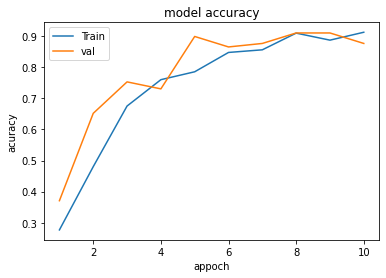

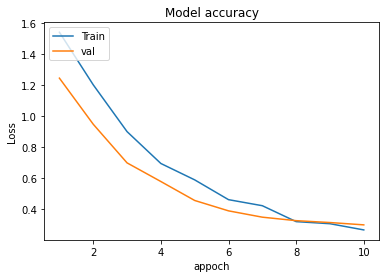

In [99]:
plot_learningCurve(history,10)

In [106]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix 

In [107]:
y_pred=model.predict_classes(X_test)

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

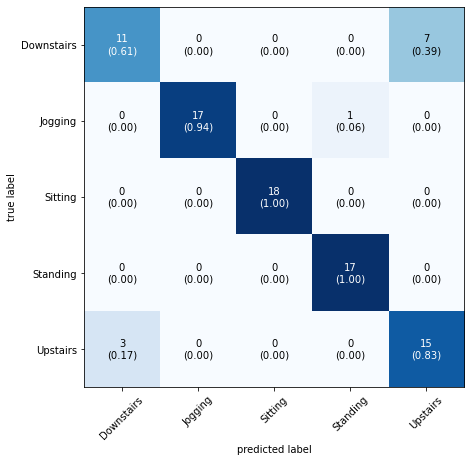

In [109]:
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,class_names=label.classes_,show_normed=True,figsize=(7,7))

In [111]:
model.save_weights('model.h5')